# Credit Risk Model EDA
This notebook contains initial exploratory data analysis.

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import load_data

In [3]:
df = load_data('../data/raw/data.csv')

Data loaded successfully from ../data/raw/data.csv


In [4]:
df.shape , df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

((95662, 16), None)

In [5]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.describe(include='all')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


In [8]:
df.duplicated().sum()

np.int64(0)

# skewness and outlier checking

## skewness for the numerical values

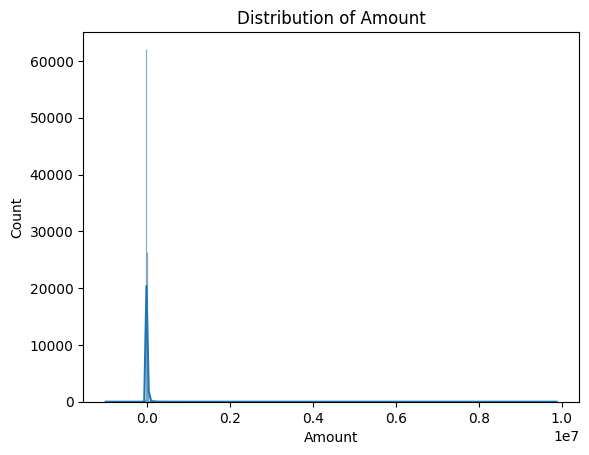

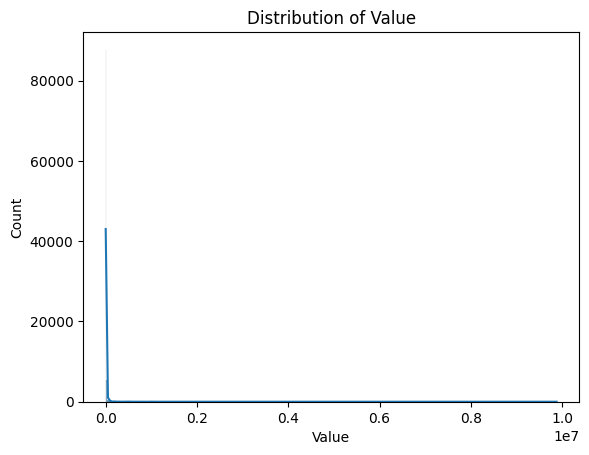

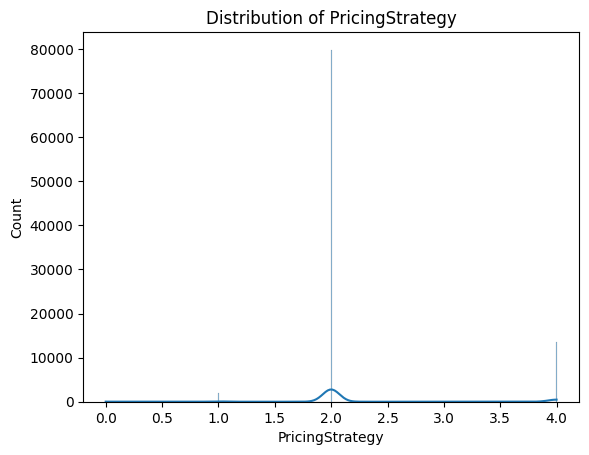

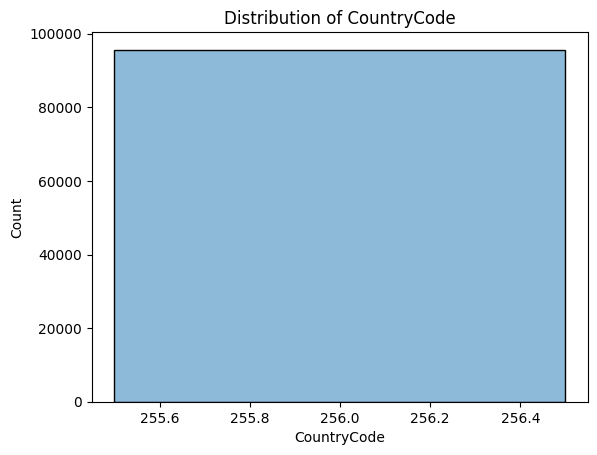

In [9]:
# numeric columns for analysis
NUMERIC_COLUMNS = ['Amount', 'Value', 'PricingStrategy', 'CountryCode']

for col in NUMERIC_COLUMNS:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### 📌 Summary of Key Insights

- **CountryCode** can be dropped because it contains only a single unique value, meaning it doesn't provide any useful variation for the model.
- Both **Amount** and **Value** are highly right-skewed, with a few large values dominating the scale. To make these features more suitable for modeling, we may apply a log transformation to reduce the skew and improve the distribution.
- **PricingStrategy** appears to be well-balanced across its categories. Since it's not skewed, we can keep it as it is and encode it using appropriate categorical encoding techniques (like one-hot encoding).


## categorical columns

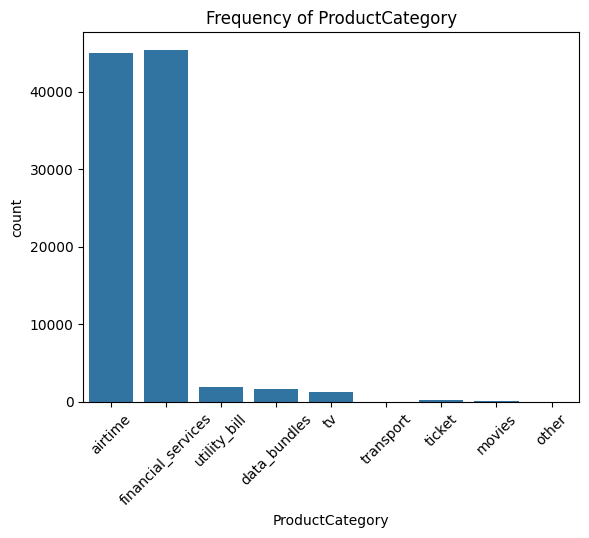

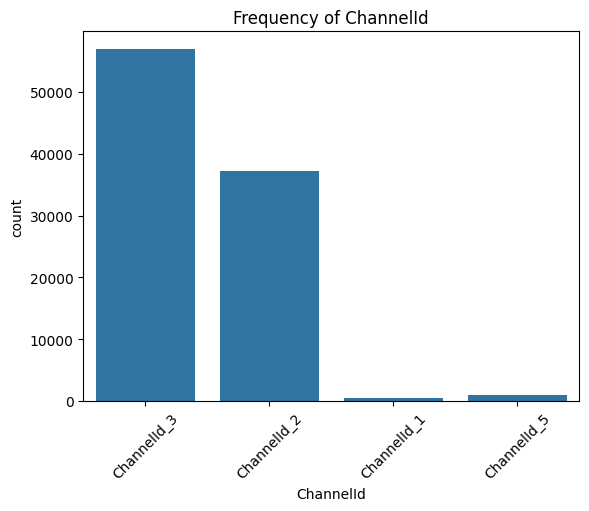

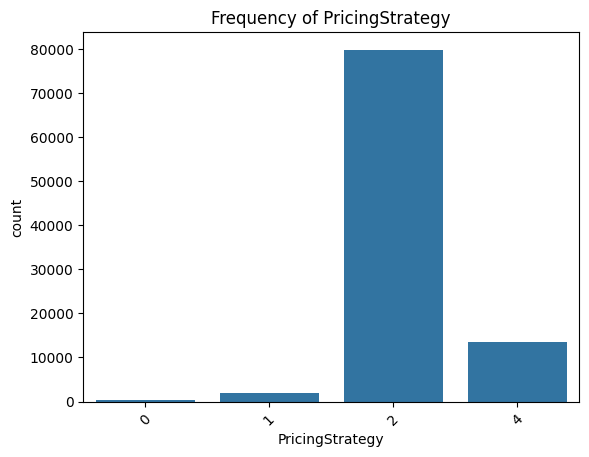

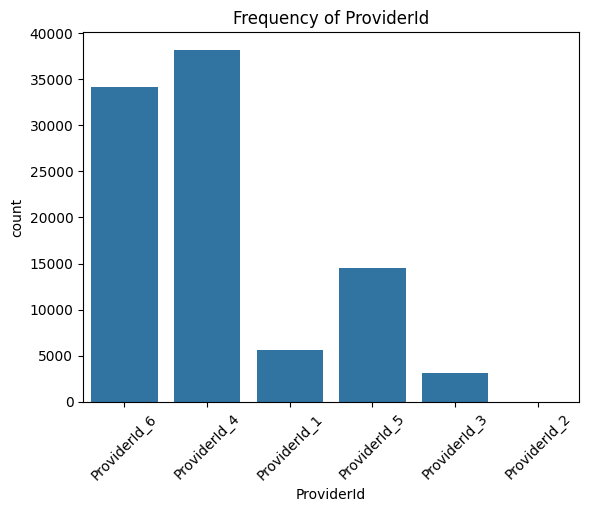

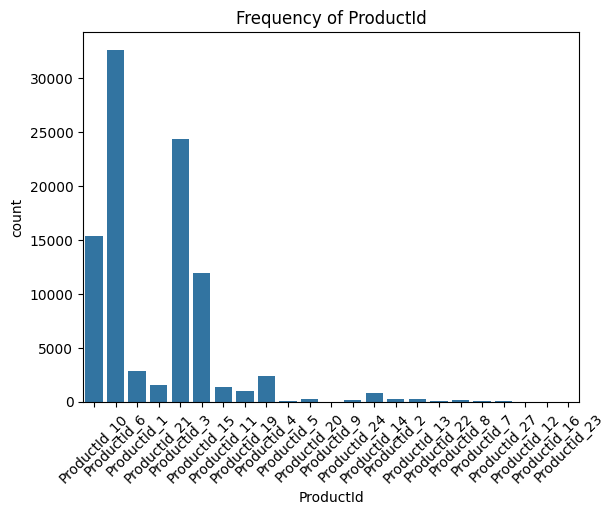

In [10]:
CATEGORICAL_COLUMNS = ['ProductCategory', 'ChannelId', 'PricingStrategy', 'ProviderId', 'ProductId']

for col in CATEGORICAL_COLUMNS:
    sns.countplot(data=df, x=col)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.show()

### high unique values category

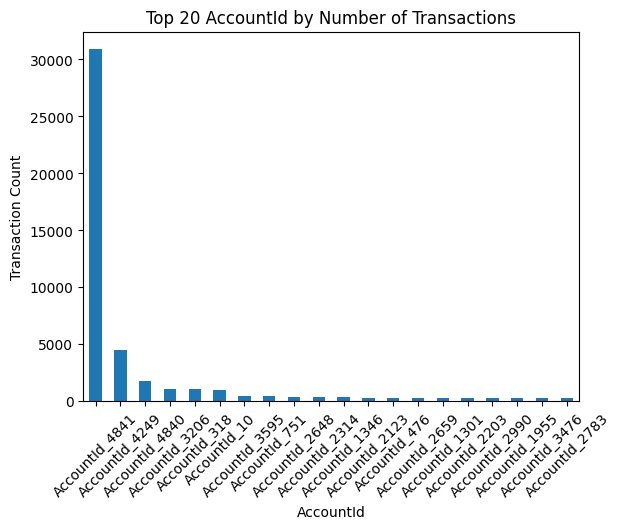

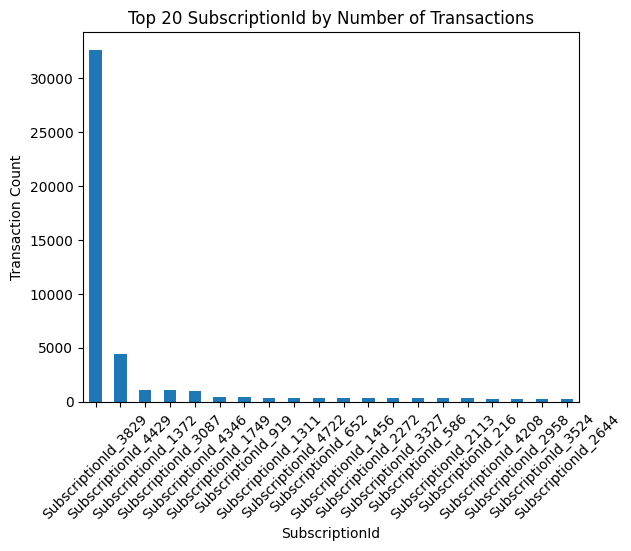

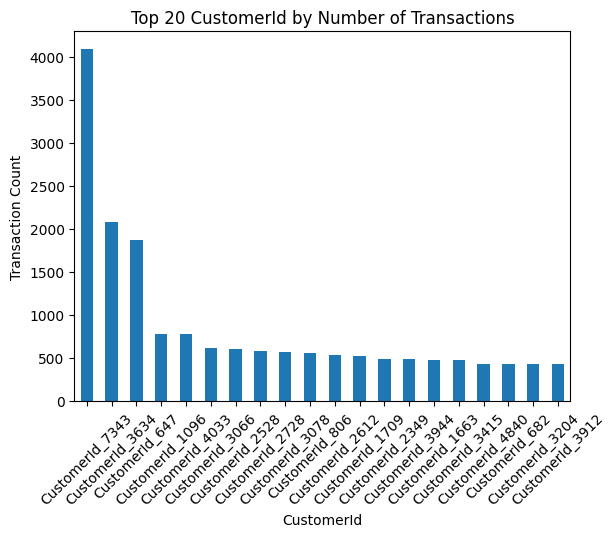

In [11]:
many_uniques = ['AccountId', 'SubscriptionId', 'CustomerId']
for col in many_uniques:
    top = df[col].value_counts().nlargest(20)
    top.plot(kind='bar')
    plt.title(f"Top 20 {col} by Number of Transactions")
    plt.ylabel("Transaction Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()


## date time analysis

Text(0.5, 1.0, 'Transactions by Hour')

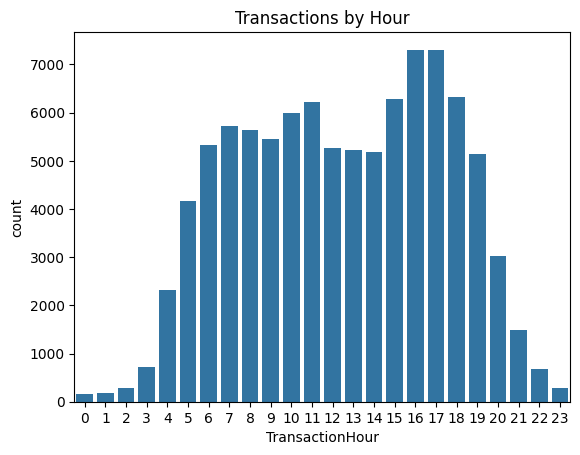

In [12]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionMonth'] = df['TransactionStartTime'].dt.month

sns.countplot(x='TransactionHour', data=df)
plt.title("Transactions by Hour")

Text(0.5, 1.0, 'Transactions by Month')

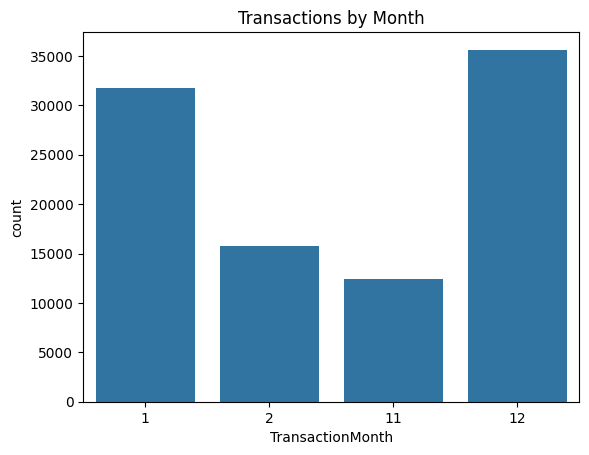

In [13]:
sns.countplot(x='TransactionMonth', data=df)
plt.title("Transactions by Month")

# Data Preparation & RFM Calculation

In [14]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [15]:
# Calculate RFM metrics per customer
rfm = df.groupby('CustomerId').agg({
    'TransactionStartTime': ['max', 'count'],
    'Amount': ['mean', 'std', lambda x: (x < 0).sum()],
    'FraudResult': 'sum'
}).reset_index()

In [16]:
# Clean up column names
rfm.columns = [
    'CustomerId', 'LastTransactionDate', 'Frequency',
    'AvgAmount', 'AmountStdDev', 'NegativeTransactions', 'FraudCount'
]

In [17]:
# Calculate Recency (days since last transaction)
latest_date = df['TransactionStartTime'].max()
rfm['Recency'] = (latest_date - rfm['LastTransactionDate']).dt.days

# Risk Score Calculation

In [18]:
# Create composite risk score (higher = riskier)
rfm['RiskScore'] = (
    rfm['Recency'] * 0.3 +  # More inactive = riskier
    (1 / rfm['Frequency']) * 0.2 +  # Less frequent = riskier
    rfm['AmountStdDev'] * 0.2 +  # More volatile = riskier
    rfm['NegativeTransactions'] * 0.2 +  # More refunds = riskier
    rfm['FraudCount'] * 0.1  # Fraud history = riskier
)

In [19]:
# Normalize score to 0-100
rfm['RiskScore'] = (rfm['RiskScore'] - rfm['RiskScore'].min()) / \
                   (rfm['RiskScore'].max() - rfm['RiskScore'].min()) * 100

In [20]:
# Classify high risk (top 20% riskiest)
risk_threshold = rfm['RiskScore'].quantile(0.8)
rfm['is_high_risk'] = (rfm['RiskScore'] >= risk_threshold).astype(int)

# Feature Analysis: Behavioral Patterns

In [21]:
# Merge risk labels back to original transactions
df = df.merge(rfm[['CustomerId', 'is_high_risk']], on='CustomerId')

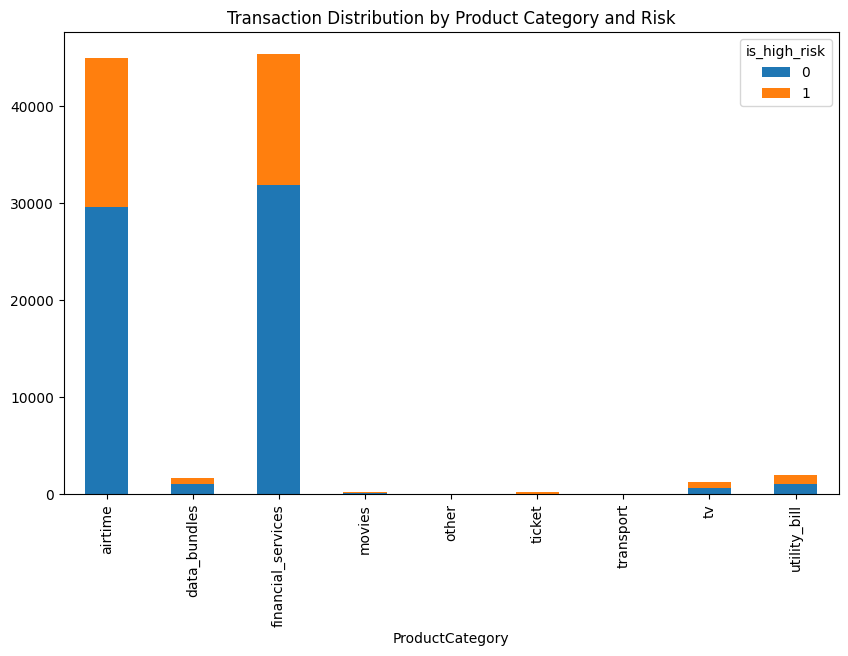

In [22]:
# A) Product Category Risk
product_risk = df.groupby(['ProductCategory', 'is_high_risk']).size().unstack()
product_risk.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Transaction Distribution by Product Category and Risk')
plt.show()

### 📊 Product Category vs Credit Risk (Summary)

We analyzed how transaction counts across `ProductCategory` relate to the `is_high_risk` label. 

- **Airtime** and **Financial Services** dominate in volume and also show a high proportion of high-risk customers.
- Other categories like **TV**, **Utility Bill**, and **Data Bundles** have lower volume and relatively fewer high-risk cases.
- This indicates that `ProductCategory` may be a useful predictor of risk and could be encoded as a feature.

➡️ Suggestion: Use one-hot or target encoding, and consider category-level risk scores in feature engineering.


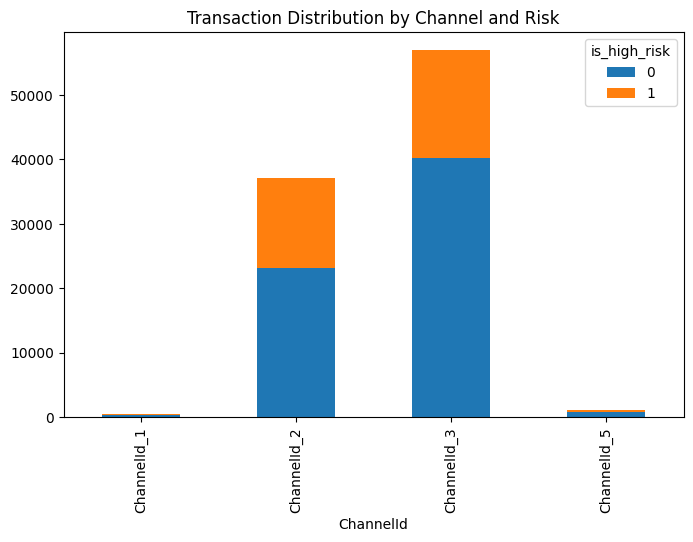

In [23]:
# B) Channel Risk
channel_risk = df.groupby(['ChannelId', 'is_high_risk']).size().unstack()
channel_risk.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Transaction Distribution by Channel and Risk')
plt.show()

# Monetary Behavior Analysis

In [24]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

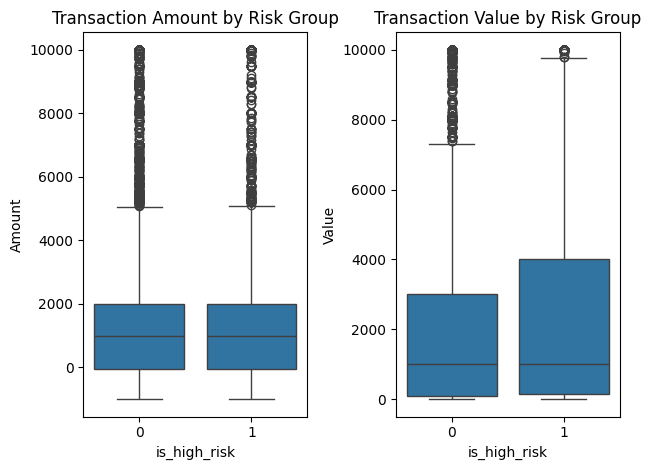

In [25]:
# A) Amount Distribution by Risk
plt.subplot(1,2,1)
sns.boxplot(x='is_high_risk', y='Amount', data=df[df['Amount'].between(-1000, 10000)])
plt.title('Transaction Amount by Risk Group')

# B) Value Distribution by Risk
plt.subplot(1,2,2)
sns.boxplot(x='is_high_risk', y='Value', data=df[df['Value'].between(0, 10000)])
plt.title('Transaction Value by Risk Group')
plt.tight_layout()
plt.show()

# Temporal Pattern Analysis

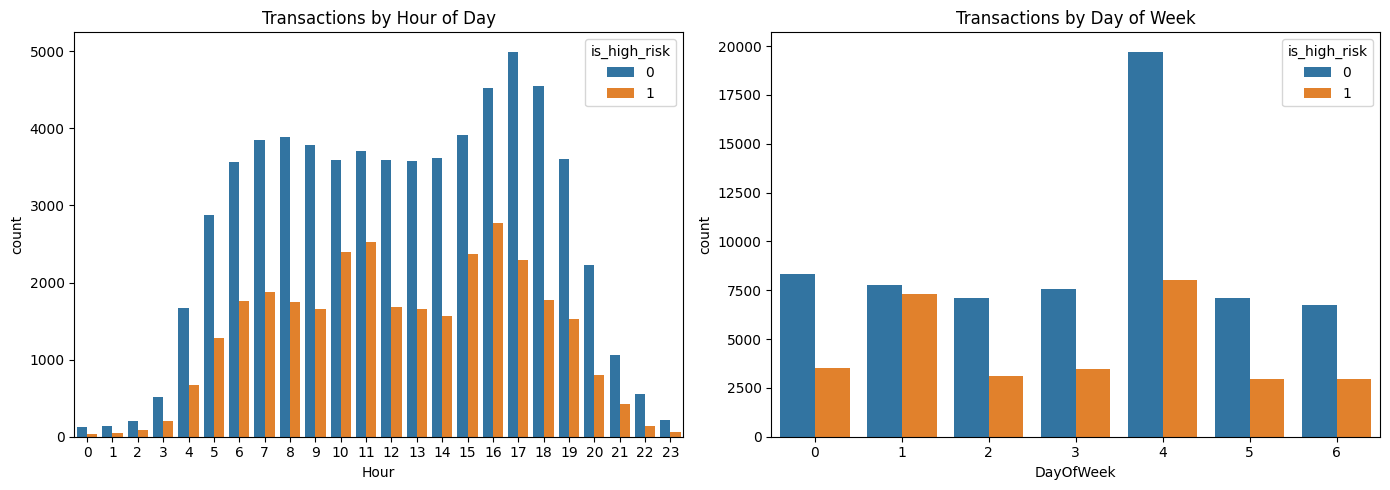

In [26]:
# Extract hour and day of week
df['Hour'] = df['TransactionStartTime'].dt.hour
df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek

# Plot transaction timing patterns
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(x='Hour', hue='is_high_risk', data=df)
plt.title('Transactions by Hour of Day')

plt.subplot(1,2,2)
sns.countplot(x='DayOfWeek', hue='is_high_risk', data=df)
plt.title('Transactions by Day of Week')

plt.tight_layout()
plt.show()

 # Correlation Analysis

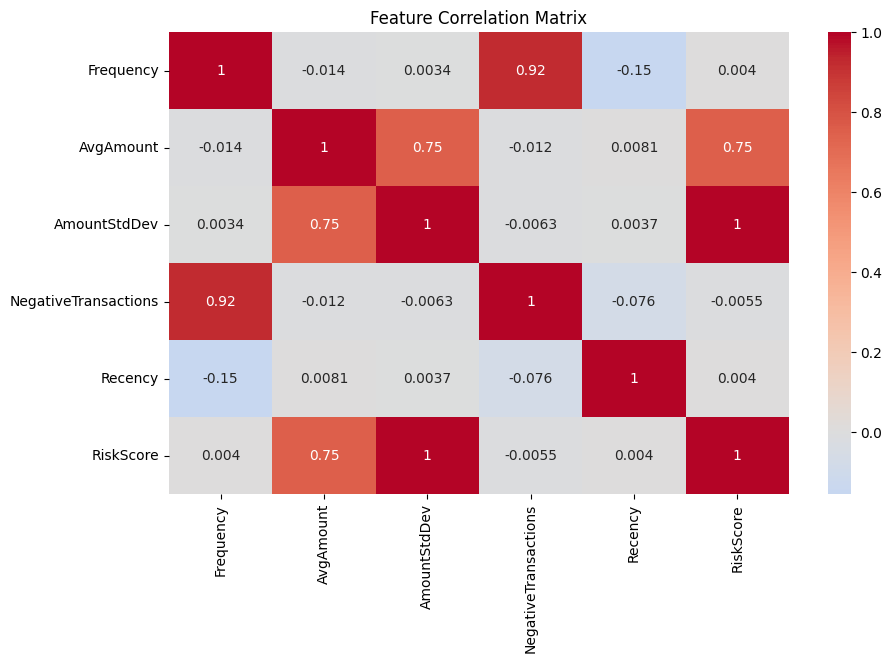

In [27]:
# Select numerical features
num_features = rfm[['Frequency', 'AvgAmount', 'AmountStdDev', 
                   'NegativeTransactions', 'Recency', 'RiskScore']]

# Correlation matrix
corr_matrix = num_features.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Statistical Significance Testing

In [28]:
from scipy.stats import mannwhitneyu

# Test if high-risk customers have different behavior
features_to_test = ['Frequency', 'AvgAmount', 'AmountStdDev', 'Recency']

for feature in features_to_test:
    low_risk = rfm[rfm['is_high_risk'] == 0][feature]
    high_risk = rfm[rfm['is_high_risk'] == 1][feature]
    
    stat, p = mannwhitneyu(low_risk, high_risk)
    print(f"{feature}: p-value = {p:.4f} ({'Significant' if p < 0.05 else 'Not significant'})")

Frequency: p-value = 0.0000 (Significant)
AvgAmount: p-value = 0.0000 (Significant)
AmountStdDev: p-value = nan (Not significant)
Recency: p-value = 0.0000 (Significant)
